# EDA of Heart Failure Data

Joel, Yaniv, Jeff<br>
Merck Challenge - Project 2<br>
Rutgers MSDS<br>
2/4/21<br>

In [36]:
### Preliminaries
import pandas as pd # essential for data analysis
import numpy as np # gives tools for working with arrays
import matplotlib.pyplot as plt # useful for plots in general
import seaborn as sns # needed for histograms
import pylab as pyl #for generating plots: show()
import statsmodels.api as sm  #to use the Logit()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


### importing LIME modules

import lime
import lime.lime_tabular


##PDP
from pdpbox import pdp, get_dataset, info_plots



In [29]:
# Loading and Checking Data
!pwd
data = pd.read_csv("y1.csv")  # type and enter pwd and see if dataset is in same directory
data.head(20)

/Users/yanivbronshtein/Coding/Rutgers/MerckChallengeIMLRepo


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,8.286628,5.963424,7.589667,6.660385,0.569224,9.0,1.0,2.0,0.00,2.160110,1.0
1,-17.463773,4.645881,-10.830877,-1.987015,4.994908,0.0,1.0,3.0,0.05,-27.049616,0.0
2,24.185695,4.244328,18.203285,10.226738,7.348010,24.0,1.0,0.0,-0.10,66.878963,1.0
3,-5.509931,5.856583,-2.099977,2.446629,4.000360,0.0,1.0,3.0,0.15,-4.200331,1.0
4,5.533965,4.888819,5.340421,5.082363,12.278937,5.0,1.0,3.0,0.20,32.787348,1.0
5,-2.713322,5.048433,-0.384795,2.719907,3.651735,0.0,1.0,5.0,0.25,-0.702585,1.0
6,22.598541,3.686563,16.924948,9.360157,5.295299,23.0,1.0,1.0,-0.30,44.811332,1.0
7,-15.746784,5.299296,-9.432960,-1.014528,3.008336,0.0,1.0,1.0,-0.35,-14.188754,0.0
8,5.481733,5.658531,5.534772,5.605492,1.110404,5.0,1.0,3.0,0.40,3.072917,1.0
9,17.138461,4.981053,13.491239,8.628276,0.578664,11.0,1.0,3.0,0.45,3.903447,1.0


In [19]:
X = data.drop('y', axis=1)
Y = data['y']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,Y_test))
print(confusion_matrix(Y_test, random_forest_preds))


The accuracy of the Random Forests model is :	 0.9833333333333333
[[ 3  1]
 [ 0 56]]


**Create a function to display the patients that the model failed to classify correctly**

In [21]:
# predicting x based on RFs (explained using lime)

predict_fn_rf = lambda x: random_forest.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Died','Survived'],kernel_width=5)

In [65]:
X_test.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
176,4.646210,5.615802,4.937087,5.324924,3.852725,0.0,0.0,4.0,8.8,9.510621
250,-9.193583,4.992797,-4.937669,0.736883,1.274156,0.0,1.0,2.0,-12.5,-3.145682
12,14.677034,5.906543,12.045886,8.537690,1.624928,15.0,1.0,2.0,-0.6,9.786848
16,16.564468,6.575078,13.567651,9.571895,1.774268,14.0,1.0,3.0,0.8,12.036327
258,3.514167,5.579256,4.133694,4.959730,1.060776,0.0,0.0,2.0,-12.9,2.192462


In [66]:
### Interpret LIME results (note: refer to data description for variable names and info)
# Ex 1:

print(X_test.loc[[176]],"death event is: ",Y_test.loc[[176]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[176]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

          x1        x2        x3        x4        x5   x6   x7   x8   x9  \
176  4.64621  5.615802  4.937087  5.324924  3.852725  0.0  0.0  4.0  8.8   

          x10  
176  9.510621   death event is:  176    1.0
Name: y, dtype: float64

number of predictors are:  10


In [64]:
### Interpret LIME results (note: refer to data description for variable names and info)
# Ex 1:

print(X_test.loc[[250]],"death event is: ",Y_test.loc[[250]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[250]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
176,4.646210,5.615802,4.937087,5.324924,3.852725,0.0,0.0,4.0,8.8,9.510621
250,-9.193583,4.992797,-4.937669,0.736883,1.274156,0.0,1.0,2.0,-12.5,-3.145682
12,14.677034,5.906543,12.045886,8.537690,1.624928,15.0,1.0,2.0,-0.6,9.786848
16,16.564468,6.575078,13.567651,9.571895,1.774268,14.0,1.0,3.0,0.8,12.036327
258,3.514167,5.579256,4.133694,4.959730,1.060776,0.0,0.0,2.0,-12.9,2.192462


# Partial Dependence Plots (PDPs)

In [35]:
feature_names = X_test.columns.tolist()
feature_names

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [37]:
def create_pdp_plot(model, feature_names, feature_name):
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature_name)

    # plot it
    pdp.pdp_plot(pdp_goals, feature_name)
    plt.show()


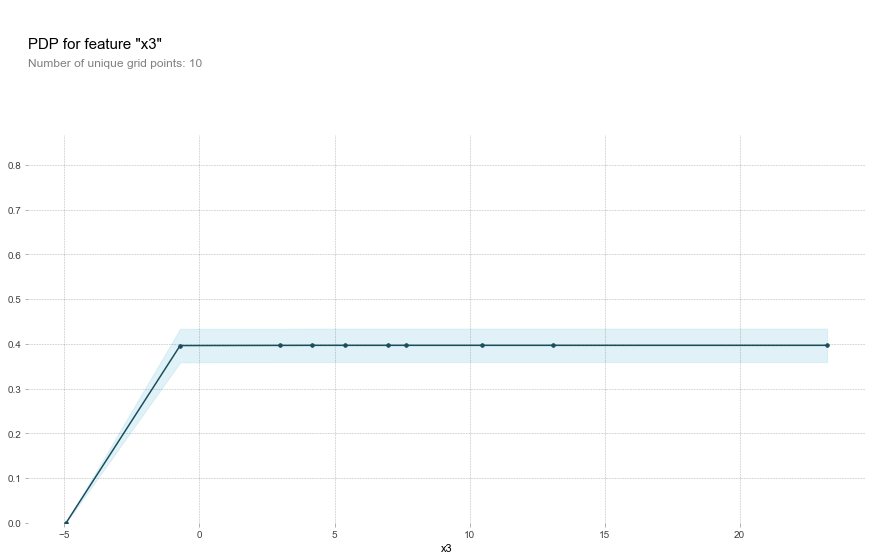

In [38]:
create_pdp_plot(random_forest, feature_names, feature_names[2])

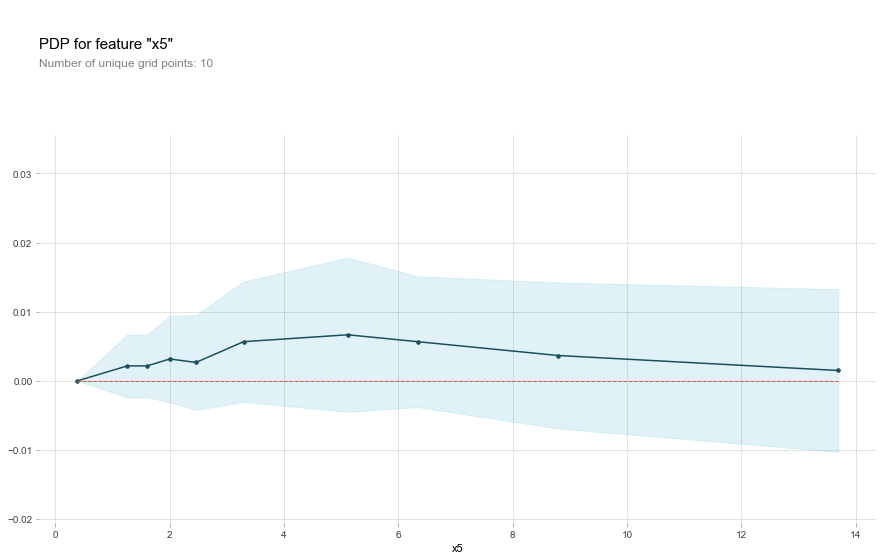

In [39]:
create_pdp_plot(random_forest, feature_names, feature_names[4])

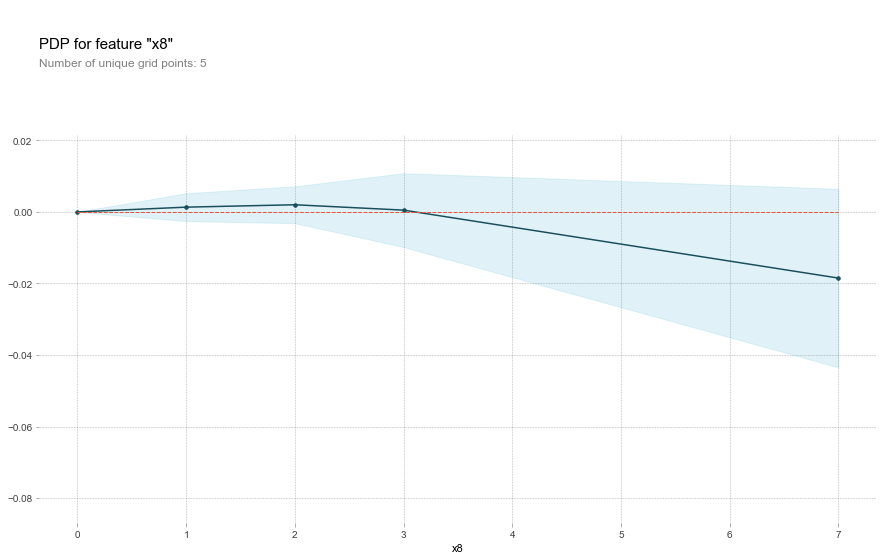

In [40]:
create_pdp_plot(random_forest, feature_names, feature_names[7])

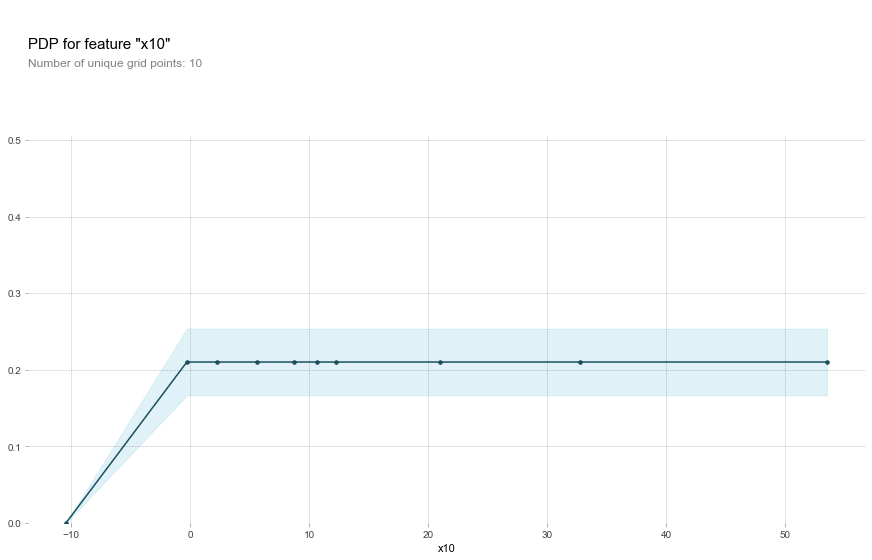

In [41]:
create_pdp_plot(random_forest, feature_names, feature_names[9])

In [42]:
create_pdp_plot(random_forest, feature_names, feature_names[10])

IndexError: list index out of range

# 2D PDP Plots

In [43]:
def create_pdp_2d(model, feature_names, indices, plot_type):
    # Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
    features_to_plot = [feature_names[i] for i in indices]
    inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type=plot_type)
    plt.show()


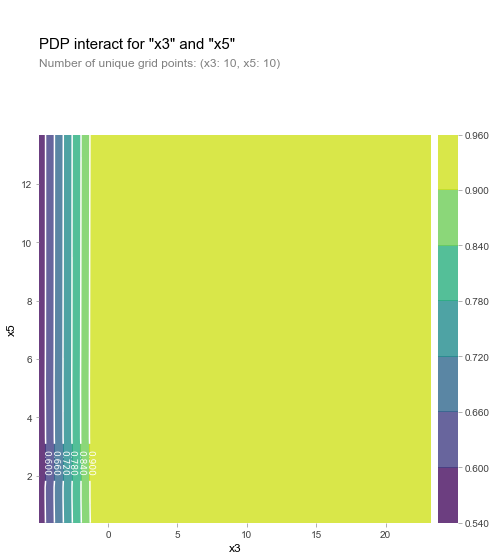

In [44]:
create_pdp_2d(random_forest, feature_names, (2,4), 'contour')

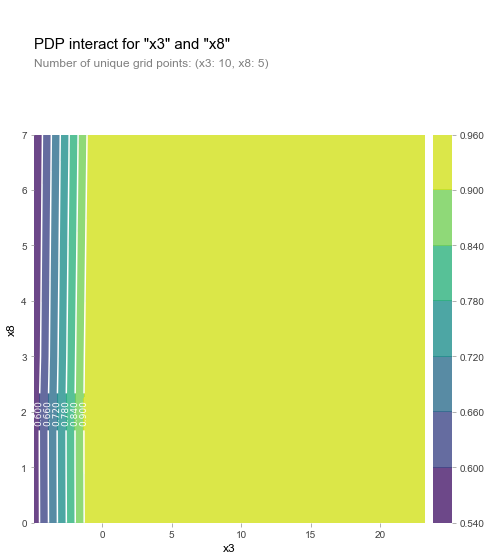

In [45]:
create_pdp_2d(random_forest, feature_names, (2,7), 'contour')

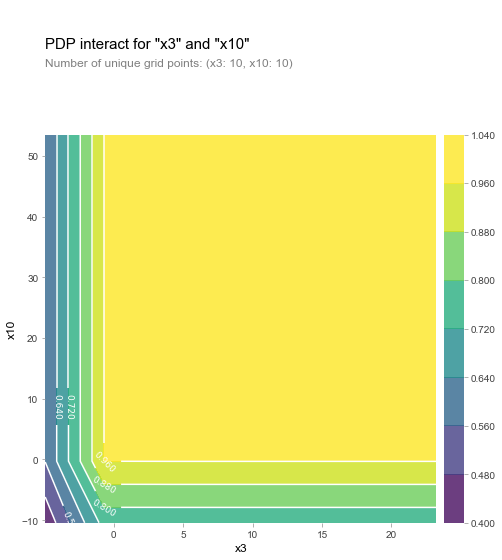

In [46]:
create_pdp_2d(random_forest, feature_names, (2,9), 'contour')

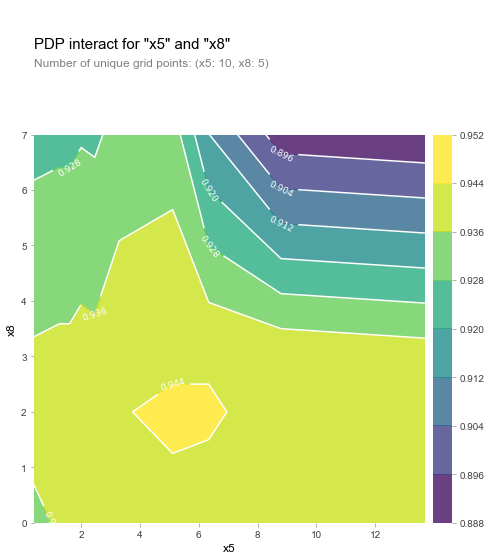

In [47]:
create_pdp_2d(random_forest, feature_names, (4,7), 'contour')

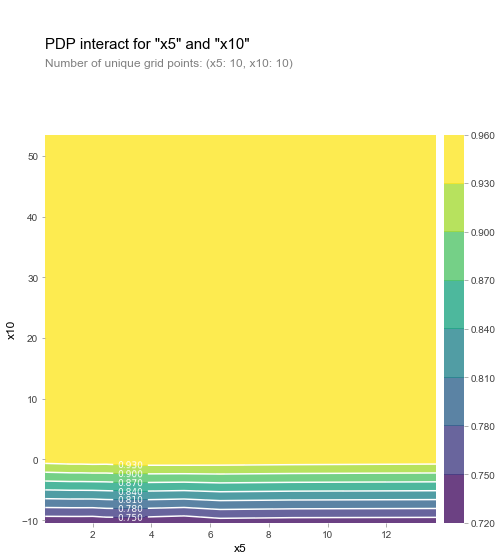

In [48]:
create_pdp_2d(random_forest, feature_names, (4,9), 'contour')

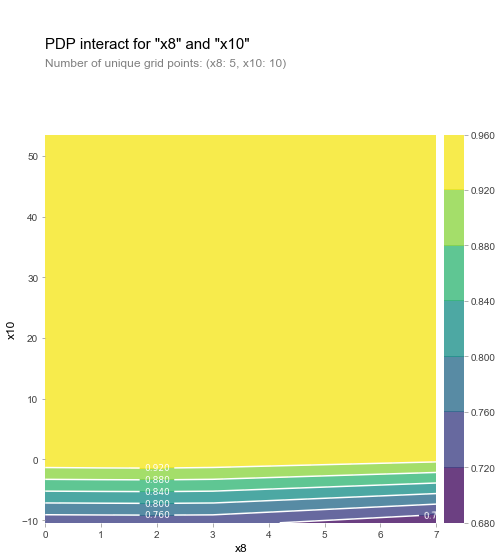

In [49]:
create_pdp_2d(random_forest, feature_names, (7,9), 'contour')

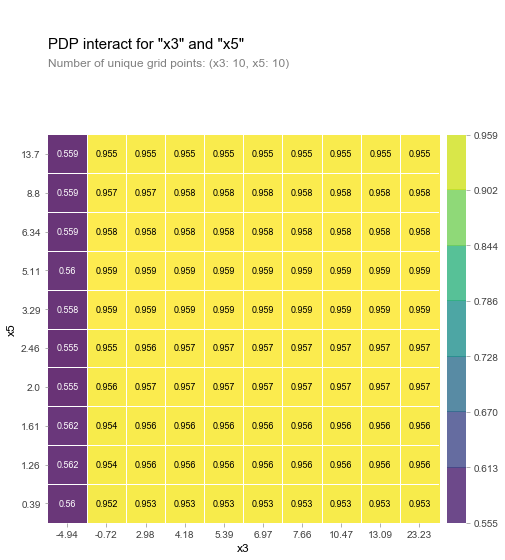

In [50]:
create_pdp_2d(random_forest, feature_names, (2,4), 'grid')

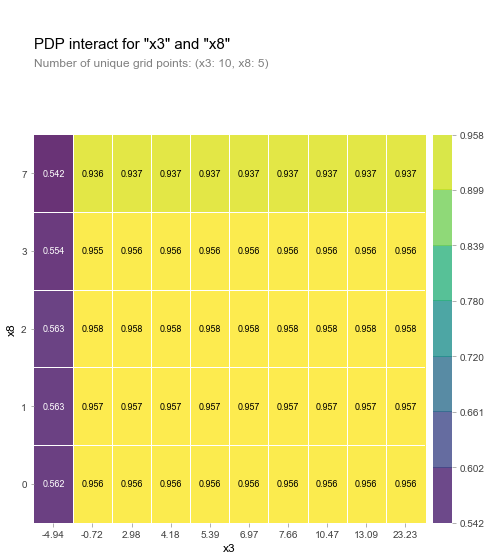

In [51]:
create_pdp_2d(random_forest, feature_names, (2,7), 'grid')

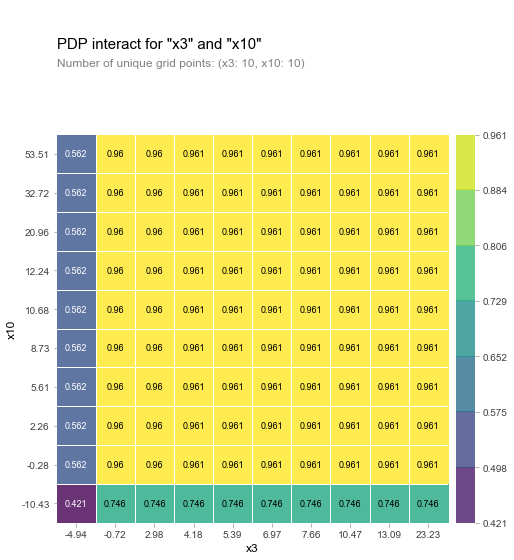

In [52]:
create_pdp_2d(random_forest, feature_names, (2,9), 'grid')

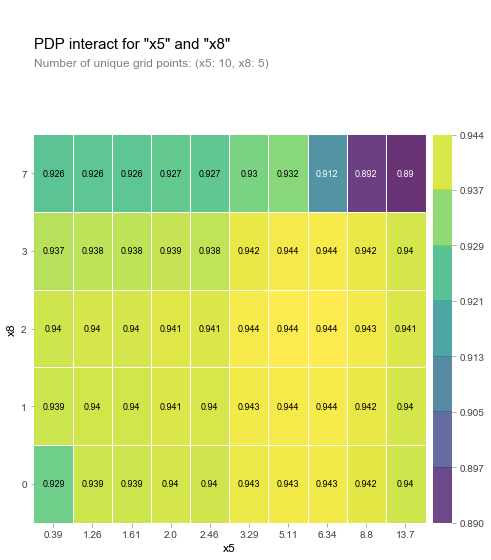

In [53]:
create_pdp_2d(random_forest, feature_names, (4,7), 'grid')

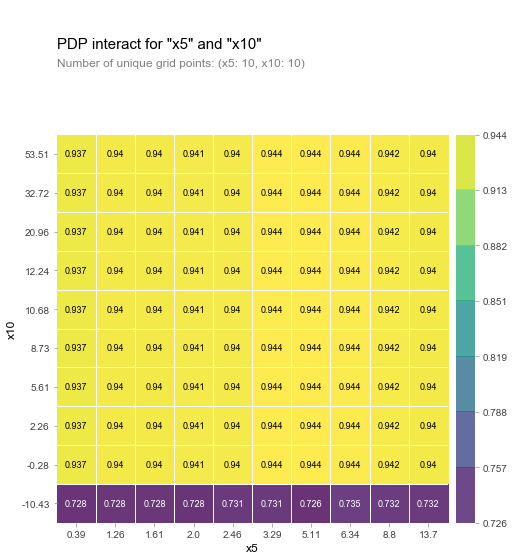

In [54]:
create_pdp_2d(random_forest, feature_names, (4,9), 'grid')

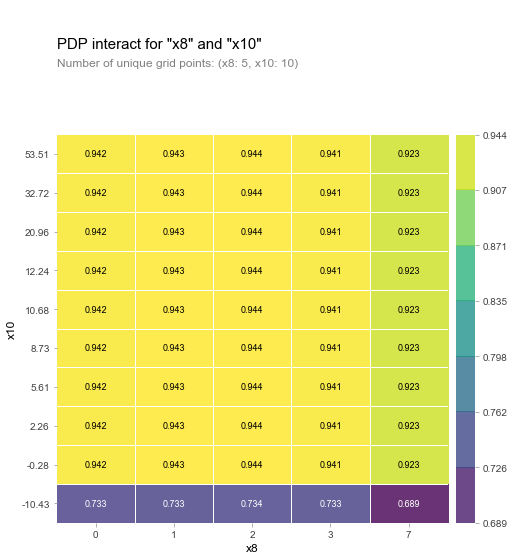

In [55]:
create_pdp_2d(random_forest, feature_names, (7,9), 'grid')

# Shapley Values

In [71]:
import shap
shap.initjs() 

In [83]:
explainer = shap.TreeExplainer(random_forest)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

In [84]:
X_test.loc[[176]]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
176,4.64621,5.615802,4.937087,5.324924,3.852725,0.0,0.0,4.0,8.8,9.510621


In [85]:
chosen_instance = X_test.loc[[176]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

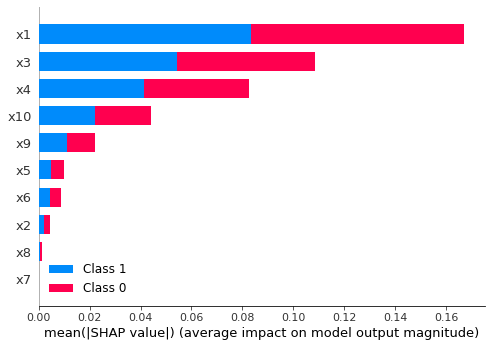

In [86]:
shap.summary_plot(shap_values, X_train)

# Permutation Feature Importance

In [88]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(random_forest, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0033 ± 0.0133,x1
0 ± 0.0000,x10
0 ± 0.0000,x9
0 ± 0.0000,x8
0 ± 0.0000,x7
0 ± 0.0000,x6
0 ± 0.0000,x5
0 ± 0.0000,x4
0 ± 0.0000,x3
0 ± 0.0000,x2


In [76]:
from sklearn.inspection import permutation_importance

In [79]:
def show_perm_importance(model, X, Y):
    r = permutation_importance(model, X, Y, n_repeats=30, random_state=42)
    importance = r.importances_mean
    for i, v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i, v))

**Importance using random_forest which was done using train-test-split with with X and Y being from the testing**

In [80]:
show_perm_importance(model=random_forest, X=X_test, Y=Y_test)

Feature: 0, Score: 0.00056
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
